### data analysis and figures for PTSD -ELS project



In [ ]:
from os.path import join
import sys
import glob

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind
import seaborn as sns
# sns.set(font_scale = 1.5)
sns.set_style("white")
import pandas as pd
import datetime
%matplotlib inline

packages for stats/ANOVA -- could't get it to work

In [ ]:
# make a new notebook for the stats!
# !pip install pingouin

for annotating graphs - super complicated and doesn't seem too helpful

In [ ]:
# !pip install statannotations

### Input/output

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

from google.colab import drive
drive.mount('/content/drive')

save_dir = '/content/drive/Shareddrives/TuriLab/Data/PTSD_project/!analysis/saveFolder/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### loading data

Loading mouse data

In [ ]:
worksheet = gc.open('all_cohorts_freezing_FINAL').sheet1

# get_all_values gives a list of rows.
data = worksheet.get_all_values()
# print(data)

# Convert to a DataFrame and render.
import pandas as pd
df = pd.DataFrame.from_records(data)
df.columns = df.iloc[0]
df.drop(df.index[0], inplace=True)
df.reset_index(inplace=True, drop=True)

# swapping out 'ptsd' to sefl in condition column
df.loc[:,('condition')].replace('ptsd','sefl', inplace=True)
# replacing NA to NaN
df.replace('NA', np.NaN, inplace=True)
# changing `freezing` dtype to float
df['freezing'] = pd.to_numeric(df['freezing'],
                                        downcast='float')
# adding unique ID-s based on `id` and `cohort`
df['cohort_id']= df['cohort']+'_'+df['id']

df['date_time'] = df['date']+' '+df['time']
df['man_date_time'] = pd.to_datetime(df['date_time'])

df['date'] = df['date'].astype('datetime64[ns]', copy=False)

print(df.dtypes)
df.head()

df.info()

0
freezing                    float32
genotype                     object
id                           object
day                          object
condition                    object
sex                          object
cohort                       object
exposure_mins                object
analyzed_duration            object
date                 datetime64[ns]
time                         object
els                          object
cohort_id                    object
date_time                    object
man_date_time        datetime64[ns]
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1165 entries, 0 to 1164
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   freezing           1160 non-null   float32       
 1   genotype           1165 non-null   object        
 2   id                 1165 non-null   object        
 3   day                1165 non-null   object        
 4   co

loading DOB-s

In [ ]:
worksheet = gc.open('id_dob').sheet1

# get_all_values gives a list of rows.
data = worksheet.get_all_values()
# print(data)

# Convert to a DataFrame and render.
import pandas as pd
dob_df = pd.DataFrame.from_records(data)
dob_df.columns = dob_df.iloc[0]
dob_df.drop(dob_df.index[0], inplace=True)
dob_df.reset_index(inplace=True, drop=True)

dob_df['cohort_id']= dob_df['cohort']+'_'+dob_df['id']
dob_df.drop(['id', 'cohort'], axis=1, inplace=True )
dob_df['dob'] = dob_df['dob'].astype('datetime64[ns]')

dob_df.head()
print(f'dob_df shape{dob_df.shape}')

dob_df shape(147, 2)


In [ ]:
# merging freezing w/ DOBs
merged_df = df.merge(dob_df,left_on='cohort_id', right_on='cohort_id')
print(merged_df.dtypes)
print(f'merged_df shape {merged_df.shape}')
merged_df.info()

######################
# saving data to csv #
######################

# merged_df.to_csv(join(save_dir, "all_cohorts_data_w_ELS_4_25_22.csv"))

0
freezing                    float32
genotype                     object
id                           object
day                          object
condition                    object
sex                          object
cohort                       object
exposure_mins                object
analyzed_duration            object
date                 datetime64[ns]
time                         object
els                          object
cohort_id                    object
date_time                    object
man_date_time        datetime64[ns]
dob                  datetime64[ns]
dtype: object
merged_df shape (1165, 16)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1165 entries, 0 to 1164
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   freezing           1160 non-null   float32       
 1   genotype           1165 non-null   object        
 2   id                 1165 non-null   object        

In [ ]:
merged_df

,freezing,genotype,id,day,condition,sex,cohort,exposure_mins,analyzed_duration,date,time,els,cohort_id,date_time,man_date_time,dob
0,3.510000,2aFlox_het,5HT2Afl05a-5,sefla,control,male,ptsd1,60,60,2021-04-03,1:34 PM,n,ptsd1_5HT2Afl05a-5,4/3/2021 1:34 PM,2021-04-03 13:34:00,2020-12-11
1,8.940000,2aFlox_het,5HT2Afl05a-5,seflb,control,male,ptsd1,3.5,3.5,2021-04-04,9:52 AM,n,ptsd1_5HT2Afl05a-5,4/4/2021 9:52 AM,2021-04-04 09:52:00,2020-12-11
2,43.099998,2aFlox_het,5HT2Afl05a-5,recall1,control,male,ptsd1,0,5,2021-04-05,9:35 AM,n,ptsd1_5HT2Afl05a-5,4/5/2021 9:35 AM,2021-04-05 09:35:00,2020-12-11
3,22.610001,2aFlox_het,5HT2Afl05a-5,recall2,control,male,ptsd1,5,5,2021-04-07,10:36 AM,n,ptsd1_5HT2Afl05a-5,4/7/2021 10:36 AM,2021-04-07 10:36:00,2020-12-11
4,37.220001,2aFlox_het,5HT2Afl05a-5,recall3,control,male,ptsd1,5,5,2021-04-09,10:17 AM,n,ptsd1_5HT2Afl05a-5,4/9/2021 10:17 AM,2021-04-09 10:17:00,2020-12-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1160,21.820000,wt,921-4,recall2,control,female,els1,,,2022-02-25,,n,els1_921-4,2/25/22,2022-02-25 00:00:00,2021-10-25
1161,18.850000,wt,921-4,recall3,control,female,els1,,,2022-03-04,,n,els1_921-4,3/4/22,2022-03-04 00:00:00,2021-10-25
1162,8.490000,wt,921-4,recall4,control,female,els1,,,2022-03-10,,n,els1_921-4,3/10/22,2022-03-10 00:00:00,2021-10-25
1163,19.090000,wt,921-4,recall5,control,female,els1,,,2022-03-18,,n,els1_921-4,3/18/22,2022-03-18 00:00:00,2021-10-25


In [ ]:
# this doesn't work as intented
# need to do this in a separeate %book. not all of the IDs
# match up

# # merging freezing w/ learning slope
# worksheet = gc.open('sefla_learning_slope').sheet1

# # get_all_values gives a list of rows.
# data = worksheet.get_all_values()
# # print(data)

# # Convert to a DataFrame and render.
# import pandas as pd
# learning_df = pd.DataFrame.from_records(data)
# learning_df.columns = learning_df.iloc[0]
# learning_df.drop(learning_df.index[0], inplace=True)
# learning_df.reset_index(inplace=True, drop=True)
# learning_df.drop([''], axis=1, inplace=True )

# learning_df.head()

# merged_df = merged_df.merge(learning_df,left_on='cohort_id', right_on='cohort_id')
# # print(merged_df.dtypes)
# merged_df.shape

(472, 16)

In [ ]:
merged_df.tail()

,freezing,genotype,id,day,condition,sex,cohort,exposure_mins,analyzed_duration,date,time,els,cohort_id,date_time,man_date_time,dob
1160,21.82,wt,921-4,recall2,control,female,els1,,,2022-02-25,,n,els1_921-4,2/25/22,2022-02-25,2021-10-25
1161,18.85,wt,921-4,recall3,control,female,els1,,,2022-03-04,,n,els1_921-4,3/4/22,2022-03-04,2021-10-25
1162,8.49,wt,921-4,recall4,control,female,els1,,,2022-03-10,,n,els1_921-4,3/10/22,2022-03-10,2021-10-25
1163,19.09,wt,921-4,recall5,control,female,els1,,,2022-03-18,,n,els1_921-4,3/18/22,2022-03-18,2021-10-25
1164,11.53,wt,921-4,recall6,control,female,els1,,,2022-03-25,,n,els1_921-4,3/25/22,2022-03-25,2021-10-25


working on age at the SEFLA

In [ ]:
mice = df[df['age_at_SEFLA']>=15]
mice.reset_index(inplace=True)
mice

,index,freezing,genotype,id,day,condition,sex,cohort,exposure_mins,analyzed_duration,date,time,cohort_id,date_time,man_date_time,dob,age_at_SEFLA
0,0,3.510000,2aFlox_het,5HT2Afl05a-5,sefla,control,male,ptsd1,60,60,2021-04-03,1:34 PM,ptsd1_5HT2Afl05a-5,4/3/2021 1:34 PM,2021-04-03 13:34:00,2020-12-11,16.142857
1,1,3.080000,wt,5HT2Afl05a-7,sefla,control,male,ptsd1,60,60,2021-04-03,1:34 PM,ptsd1_5HT2Afl05a-7,4/3/2021 1:34 PM,2021-04-03 13:34:00,2020-12-11,16.142857
2,3,0.700000,wt,sert26a-3,sefla,control,male,ptsd1,60,60,2021-04-03,1:58 PM,ptsd1_sert26a-3,4/3/2021 1:58 PM,2021-04-03 13:58:00,2020-11-30,17.714286
3,4,45.130001,wt,5HT2Afl5a-6,sefla,SEFL,male,ptsd1,60,60,2021-04-03,3:03 PM,ptsd1_5HT2Afl5a-6,4/3/2021 3:03 PM,2021-04-03 15:03:00,2020-12-11,16.142857
4,6,69.559998,sert_het,sert26a-2,sefla,SEFL,male,ptsd1,60,60,2021-04-03,1:58 PM,ptsd1_sert26a-2,4/3/2021 1:58 PM,2021-04-03 13:58:00,2020-11-30,17.714286
5,18,6.150000,wt,2,sefla,control,male,ptsd3,60,60,2021-05-19,1:00 PM,ptsd3_2,5/19/2021 1:00 PM,2021-05-19 13:00:00,2021-01-15,17.714286
6,23,4.440000,wt,12,sefla,SEFL,male,ptsd3,60,60,2021-05-19,2:24 PM,ptsd3_12,5/19/2021 2:24 PM,2021-05-19 14:24:00,2021-01-03,19.428571
7,24,61.919998,wt,1,sefla,SEFL,male,ptsd3,60,60,2021-05-19,3:05 PM,ptsd3_1,5/19/2021 3:05 PM,2021-05-19 15:05:00,2021-01-15,17.714286
8,25,62.950001,wt,3,sefla,SEFL,male,ptsd3,60,60,2021-05-19,3:05 PM,ptsd3_3,5/19/2021 3:05 PM,2021-05-19 15:05:00,2021-01-15,17.714286
9,29,62.119999,wt,11,sefla,SEFL,male,ptsd3,60,60,2021-05-19,5:36 PM,ptsd3_11,5/19/2021 5:36 PM,2021-05-19 17:36:00,2021-01-03,19.428571


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


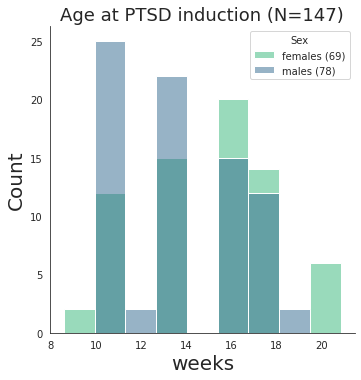

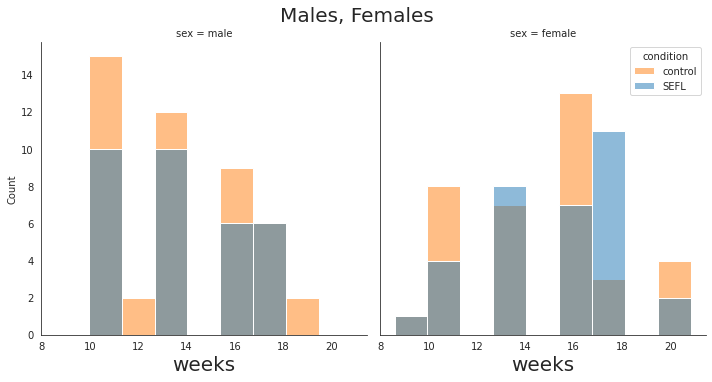

In [ ]:
df = merged_df[merged_df["day"] == "sefla"]

df['age_at_SEFLA'] = (df.loc[:,('date')] - df.loc[:,('dob')]).dt.days/7
df.reset_index(inplace=True, drop=True)
# print(df.dtypes)
# df.head()

# plot1
num_sexes = merged_df.groupby(['sex'])['cohort_id'].nunique()
num_mice = merged_df.cohort_id.nunique()

d = sns.displot(df, x='age_at_SEFLA', hue='sex', palette="viridis",
                legend=False)
plt.title('Age at PTSD induction (N=%s)' %num_mice, fontsize=18)
d.set_xlabels('weeks', fontsize=20)
d.set_ylabels(fontsize=20)
plt.legend(title='Sex', loc='upper right', labels=['females (%s)' % num_sexes[0],
                                                   'males (%s)' % num_sexes[1]])

# plot2
d2 = sns.displot(df, x="age_at_SEFLA", col="sex", hue="condition",
                 legend=False)
d2.set_xlabels('weeks', fontsize=20)
d2.fig.suptitle("Males, Females", y=1.03, fontsize=20)
plt.legend(title='condition', loc='upper right', labels=['control','SEFL'])


# d.savefig(os.path.join(save_path, 'SEFL_age_at_PTSD_all.png'),
#           transparent=True, dpi=300)
# d2.savefig(os.path.join(save_path, 'SEFL_age_at_PTSD_sexes.png'),
#            transparent=True, dpi=300)

# TODO: controlling the titles of the hue'ed plots

In [ ]:
# cohorts included
print(f'cohorts: {merged_df.cohort.unique()}')
print(f'number of mice: {merged_df.cohort_id.nunique()}')
print(merged_df.groupby(['sex'])['cohort_id'].nunique())

cohorts: ['ptsd1' 'ptsd2' 'ptsd3' 'ptsd4' 'ptsd5' 'ptsd6' 'ptsd7' 'ptsd8' 'ptsd9'
 'ptsd10' 'els1']
number of mice: 147
sex
female    69
male      78
Name: cohort_id, dtype: int64


### Plotting stuff

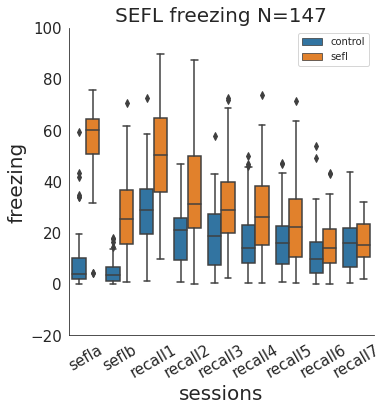

<Figure size 1800x1200 with 0 Axes>

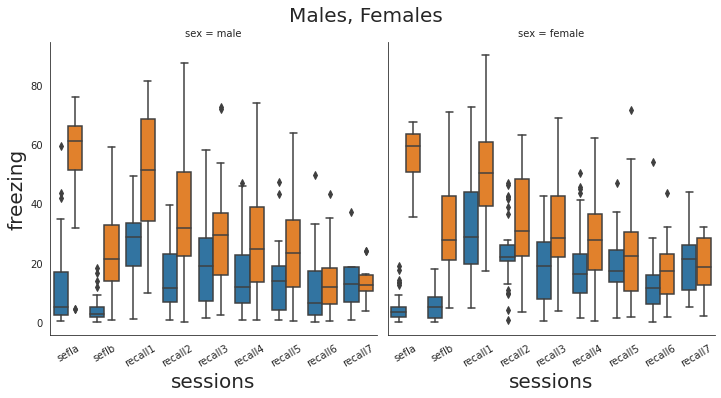

In [ ]:
# all mice, including ELS

g = sns.catplot(data = merged_df, kind='box',
                x="day", y="freezing", hue="condition", legend=False,
                hue_order=['control', 'sefl'])

plt.title(f'SEFL freezing N={merged_df.cohort_id.nunique()}',
          fontsize=20)
plt.legend(loc='upper right')
g.set_xticklabels(rotation=30, fontsize=15)
g.set_xlabels('sessions', fontsize=20)
g.set_ylabels(fontsize=20)
g.set_yticklabels(fontsize=15)
plt.figure(dpi=300)

# plot2
g2 = sns.catplot(data= merged_df, kind='box',
                x='day', y='freezing', hue='condition',
                 col='sex', legend=False, hue_order=['control', 'sefl'])
g2.set_xticklabels(rotation = 30)
g2.set_ylabels(fontsize=20)
g2.fig.suptitle("Males, Females", y=1.03, fontsize=20)
g2.set_xlabels('sessions', fontsize=20)

# g.savefig(os.path.join(save_path, 'SEFL_freezing_at_PTSD_all_boxplot_97.png'),
#           transparent=True, dpi=300)
# g2.savefig(os.path.join(save_path, 'SEFL_freezing_at_PTSD_sexes_boxplot_97.png'),
#            transparent=True, dpi=300)

In [ ]:
# # this prints out the freezing for every cohort.
# cohorts = merged_df.cohort.unique()

# for cohort in cohorts:
#   cohort_data = merged_df[merged_df['cohort']==cohort]
#   g = sns.catplot(data = cohort_data, kind='bar',
#                x="day", y="freezing", hue="condition",
#                hue_order=["control", "SEFL"])
#   g.set_xticklabels(rotation = 30)
#   g.set(title = {cohort: str(cohort_data.sex.unique())})

# # g.set(title = f'SEFL freezing N={freezing.cohort_id.nunique()}')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


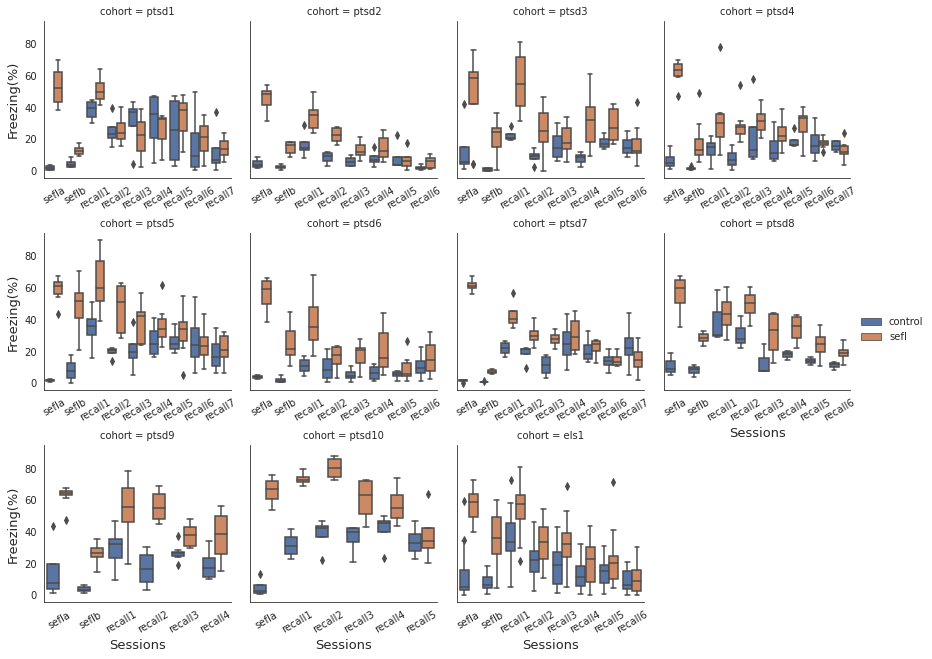

In [ ]:
g = sns.FacetGrid(merged_df, col="cohort", col_wrap=4,
                  sharey=True, sharex=False
                  )
g.map(sns.boxplot, "day", "freezing", "condition",
      hue_order=["control", "sefl"], palette="deep"
      )
g.set_xticklabels(rotation = 30)
g.add_legend()
g.figure.subplots_adjust(hspace=.35)
g.set_axis_labels("Sessions", "Freezing(%)")
g.set_xlabels(fontsize=13)
g.set_ylabels(fontsize=13)
# g.savefig(os.path.join(save_path, 'SEFL_frezing_per_cohort_boxplot_2by4.png'),
#           transparent=True, dpi=300)

Excluded cohorts:
- ptsd1, 7 -> sleep
- ptsd8, 10 -> sert
other FYI-s:
- ptsd9 -> only 4 recalls

<Figure size 1800x1200 with 0 Axes>

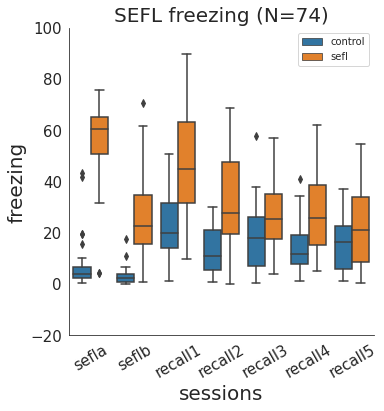

<Figure size 1800x1200 with 0 Axes>

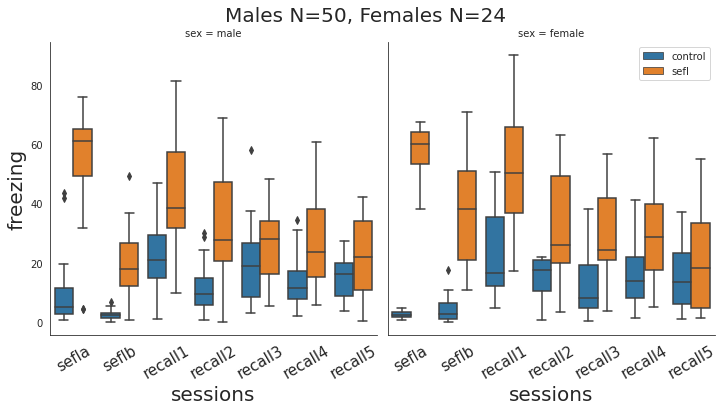

<Figure size 1800x1200 with 0 Axes>

In [ ]:
cohort_list = ['ptsd2','ptsd3', 'ptsd4', 'ptsd5', 'ptsd6', 'ptsd9']
day_list = ['sefla','seflb','recall1', 'recall2', 'recall3',
            'recall4', 'recall5']
filtered_freezing = merged_df[(merged_df['cohort'].isin(cohort_list)) &
                              (merged_df['day'].isin(day_list))]
# filtered_freezing plot1
g = sns.catplot(data = filtered_freezing, kind='box',
               x="day", y="freezing", hue="condition", legend=False,
               )
plt.title(f'SEFL freezing (N={filtered_freezing.cohort_id.nunique()})',
          fontsize=20)
plt.legend(loc='upper right')
g.set_xticklabels(rotation=30, fontsize=15)
g.set_xlabels('sessions', fontsize=20)
g.set_ylabels(fontsize=20)
g.set_yticklabels(fontsize=15)
plt.figure(dpi=300)

# filtered_freezing plot2
num_sexes = filtered_freezing.groupby(['sex'])['cohort_id'].nunique()

g2 = sns.catplot(data= filtered_freezing, kind='box',
                x='day', y='freezing', hue='condition',
                 col='sex', legend=False)

plt.legend(loc='upper right')
g2.set_xticklabels(rotation = 30, fontsize=15)
g2.set_xlabels('sessions', fontsize=20)
g2.set_ylabels(fontsize=20)
g.set_yticklabels(fontsize=15)

title = f'Males N={num_sexes[1]}, Females N={num_sexes[0]}'
g2.fig.suptitle(title, y=1.03, fontsize=20)
plt.figure(dpi=300)

# saving
# g.savefig(os.path.join(save_path,
#                        'SEFL_frezing_selected_cohorts_boxplot.png'),
#           transparent=True, dpi=300)
# g2.savefig(os.path.join(save_path,
#                        'SEFL_frezing_selected_cohorts_males_females_boxplot.png'),
#            transparent=True, dpi=300)

(352, 16)

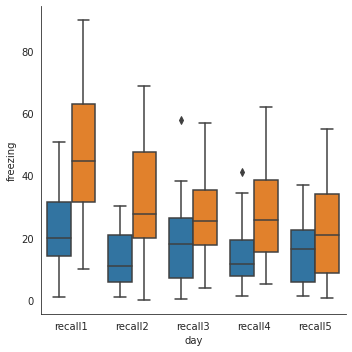

In [ ]:
# exporting data to CSV
day_list = ['recall1', 'recall2', 'recall3',
            'recall4', 'recall5']
anova_df = filtered_freezing[filtered_freezing['day'].isin(day_list)]
anova_df.shape
g = sns.catplot(data = anova_df, kind='box',
               x="day", y="freezing", hue="condition", legend=False)
# anova_df.to_csv(save_path+'dataTamasnak.csv')
anova_df.shape

### **Running Stats**
~~`Two-way repeated measures ANOVA`~~ based on [this](https://www.reneshbedre.com/blog/repeated-measure-anova.html#two-way-repeated-measures-anova-within-within-subjects-anova). This should be a mixed ANOVA and it was ran based on [this](https://www.reneshbedre.com/blog/mixed-anova.html)

In [ ]:
anova_df.head(2)
# anova_df.groupby(['condition', 'cohort_id']).nunique()

,freezing,genotype,id,day,condition,sex,cohort,exposure_mins,analyzed_duration,date,time,cohort_id,date_time,man_date_time,dob
74,8.28,wt,81,recall1,control,male,ptsd2,5,5,2021-04-30,1:37 PM,ptsd2_81,4/30/2021 1:37 PM,2021-04-30 13:37:00,2021-02-16
75,7.12,wt,81,recall2,control,male,ptsd2,5,5,2021-05-03,10:17 AM,ptsd2_81,5/3/2021 10:17 AM,2021-05-03 10:17:00,2021-02-16


In [ ]:
# Two-way repeated
import pingouin as pg
# res = pg.rm_anova(dv='freezing', within=['condition', 'day'],
#                      subject='cohort_id',data=anova_df)

#########
# mixed #
#########
res = pg.mixed_anova(dv='freezing', between='condition', within='day',
                     subject='cohort_id',data=anova_df)
res

,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,condition,14397.980881,1,55,14397.980881,24.263996,8.060500e-06,NaN,0.306116,NaN,NaN,NaN,NaN
1,day,11299.977496,4,220,2824.994374,24.605053,7.594362e-17,2.895158e-11,0.309089,0.673406,False,0.443652,0.000001
2,Interaction,2882.627561,4,220,720.656890,6.276756,8.435711e-05,NaN,0.102433,NaN,NaN,NaN,NaN


In [ ]:
# t-tests on the recall days
df = anova_df
days = ['recall1', 'recall2', 'recall3', 'recall4', 'recall5']
stats = []

for day in days:
  test_df = df[df["day"] == day]
  ctrl = test_df[test_df["condition"] == "control"]
  sefl = test_df[test_df["condition"] == "SEFL"]
  stats.append((day, ttest_ind(ctrl['freezing'], sefl['freezing'])))
stats

[('recall1',
  Ttest_indResult(statistic=-5.723523148804082, pvalue=2.2348158881021264e-07)),
 ('recall2',
  Ttest_indResult(statistic=-5.72749212043646, pvalue=2.1992222946798558e-07)),
 ('recall3',
  Ttest_indResult(statistic=-2.9131410119746857, pvalue=0.004762771614473952)),
 ('recall4',
  Ttest_indResult(statistic=-3.456714440965177, pvalue=0.0010618167403887424)),
 ('recall5',
  Ttest_indResult(statistic=-1.7752394445437816, pvalue=0.08139164333915824))]

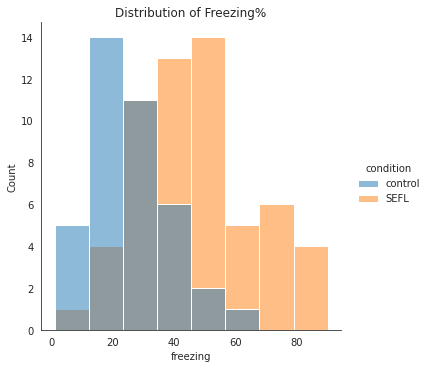

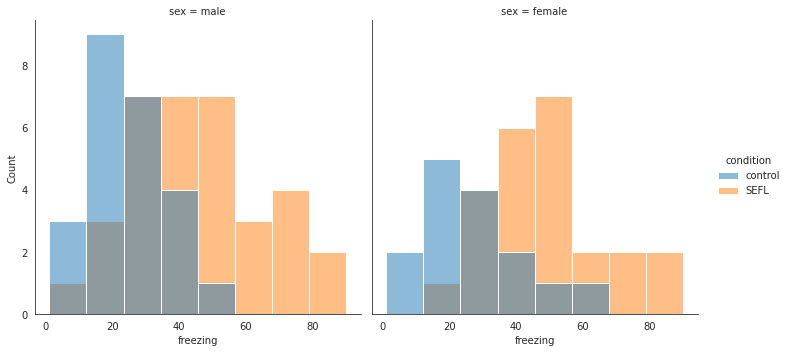

In [ ]:
df = merged_df[merged_df["day"] == "recall1"]
# control = df[df["condition"] == "control"]
# sefl = df[df["condition"] == "SEFL"]
d = sns.displot(df, x="freezing", hue="condition", bins=8)
d.set(title='Distribution of Freezing%')
d2 = sns.displot(df, x="freezing", col="sex", hue="condition", bins=8)

# saving figures
# d.savefig(os.path.join(save_path+'Freezing_distributions_all_recall1.png'),
#           transparent=True, dpi=300)
# d2.savefig(os.path.join(save_path+'freezing_dsitribution_sexes_recall1.png'),
#            transparent=True, dpi=300)

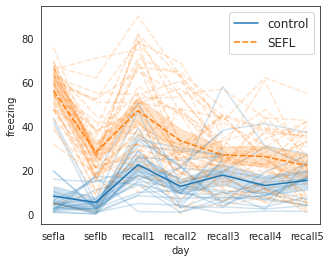

In [ ]:
f, ax = plt.subplots(figsize=(5,4))
g = sns.lineplot(data=filtered_freezing, x='day', y='freezing', hue='condition',
                 units='cohort_id', estimator=None, style='condition', alpha=.2,
                 ax=ax)
g = sns.lineplot(data=filtered_freezing, x='day', y='freezing', hue='condition',
                 style='condition', legend=False, ax=ax)
plt.legend(fontsize=12)

# plt.savefig(os.path.join(save_path, "freezing_mean_across_days.png"),
#           transparent=True, dpi=300)

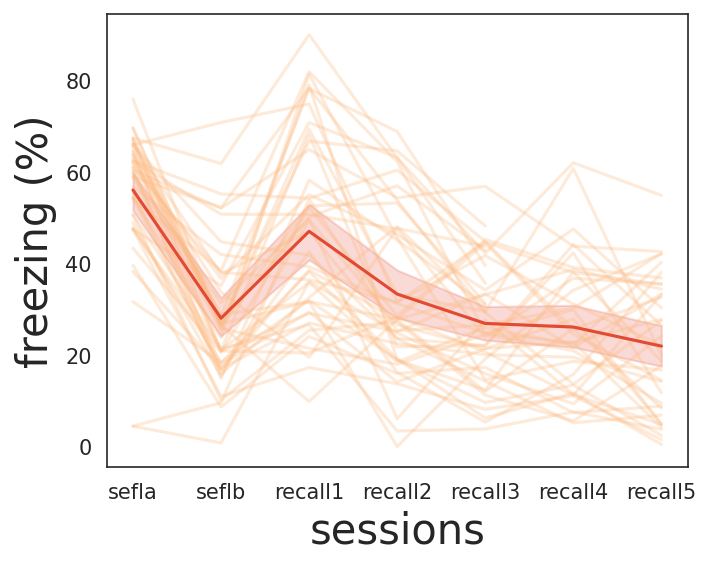

In [ ]:
f, ax = plt.subplots(figsize=(5,4),dpi=150)
g = sns.lineplot(data=filtered_freezing[filtered_freezing['condition']=='SEFL'],
                 x='day', y='freezing', estimator=None, alpha=.3,units='cohort_id',
                 ax=ax, color='#fdbb84')
g = sns.lineplot(data=filtered_freezing[filtered_freezing['condition']=='SEFL'],
                 x='day', y='freezing',
                 ax=ax, color='#e34a33')
ax.set_ylabel('freezing (%)',fontsize=20)
ax.set_xlabel('sessions', fontsize=20)

plt.savefig(os.path.join(save_path, 'SEFL_freezing.png'),
          transparent=True, dpi=300)
# plt.legend(fontsize=20)

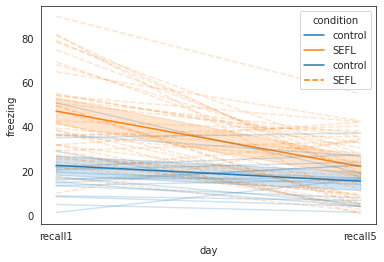

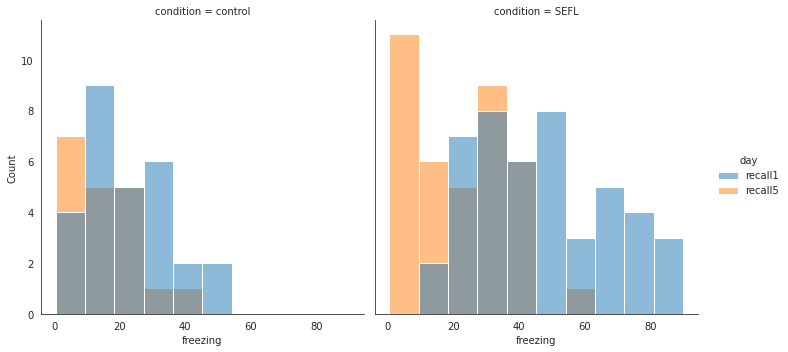

In [ ]:
# freezing on recall1 recall5
crit_list = ['recall1', 'recall5']
fila_df = filtered_freezing[filtered_freezing['day'].isin(crit_list)]
fila_df.head()
g = sns.lineplot(data=fila_df, x='day', y='freezing', hue='condition')
g2 = sns.lineplot(data=fila_df, x='day', y='freezing', hue='condition',
                 units='cohort_id', estimator=None, style='condition', alpha=.2)
g3 = sns.displot(fila_df, col="condition", x="freezing", hue="day") #TODO:fix the color order!

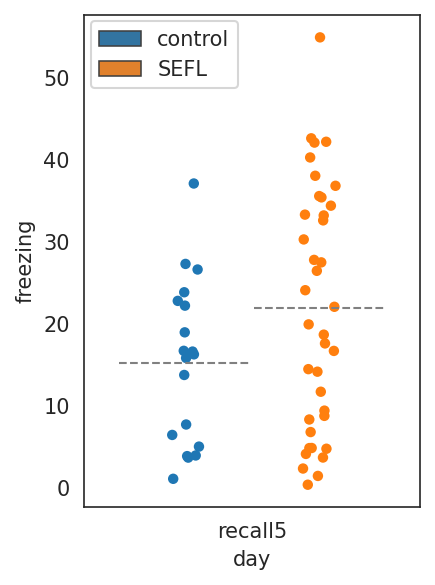

In [ ]:
# freezing on recall1 recall5
f, ax = plt.subplots(figsize=(3,4), dpi=150)
recall5_df = filtered_freezing[filtered_freezing['day'] == "recall5"]
g = sns.stripplot(data=recall5_df, x='day', y='freezing', hue='condition',
                  dodge=True)
# adding pop means
sns.boxplot(hue='condition',showmeans=True,x='day', y='freezing',
            meanline=True,
            meanprops={'color': 'grey', 'ls': '--', 'lw': 1},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            data=recall5_df,
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=g)
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:2], labels[0:2], borderaxespad=.3)
plt.tight_layout()
# plt.savefig(os.path.join(save_path, "recall5_freezing_stripplot.png"),
#           transparent=True, dpi=300)

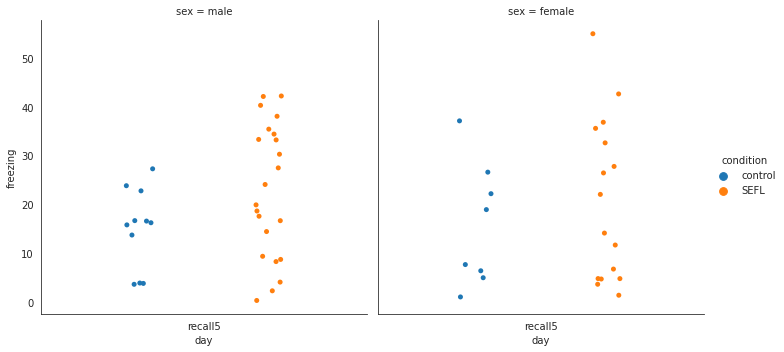

In [ ]:
# f, ax = plt.subplots(figsize=(3,4), dpi=300)
recall5_df = filtered_freezing[filtered_freezing['day'] == "recall5"]
g = sns.catplot(data=recall5_df, x='day', y='freezing', hue='condition',col='sex',
                  dodge=True)

unmelting the damn thing

In [ ]:
# new_inx = ['day']
wide_df = filtered_freezing.pivot(index=['cohort_id', 'sex',
                                         'condition'],columns='day',
                                  values='freezing')
wide_df.head()

,,day,recall1,recall2,recall3,recall4,recall5,sefla,seflb
cohort_id,sex,condition,,,,,,,
ptsd2_81,male,control,8.280000,7.120000,7.57,6.61,3.920000,5.030000,0.450000
ptsd2_82,male,control,28.799999,11.140000,3.22,2.24,3.740000,8.830000,4.200000
ptsd2_83,male,SEFL,38.529999,27.709999,12.03,25.84,8.380000,54.360001,16.900000
ptsd2_84,male,SEFL,25.389999,27.240000,11.23,5.62,17.639999,50.639999,10.140000
ptsd2_85,male,SEFL,31.889999,18.969999,9.61,13.41,2.410000,31.650000,18.379999


In [ ]:
corr = wide_df.groupby('condition').corr()
corr

day                 recall1   recall2   recall3  ...   recall5     sefla     seflb
condition day                                    ...                              
SEFL      recall1  1.000000  0.594797  0.318142  ...  0.234515  0.163566  0.490239
          recall2  0.594797  1.000000  0.636015  ...  0.373266  0.268263  0.457720
          recall3  0.318142  0.636015  1.000000  ...  0.549928  0.363605  0.516753
          recall4  0.507972  0.417775  0.576665  ...  0.510614  0.401987  0.423741
          recall5  0.234515  0.373266  0.549928  ...  1.000000  0.072292  0.334150
          sefla    0.163566  0.268263  0.363605  ...  0.072292  1.000000  0.506169
          seflb    0.490239  0.457720  0.516753  ...  0.334150  0.506169  1.000000
control   recall1  1.000000  0.349505  0.447489  ...  0.488570  0.281431  0.023818
          recall2  0.349505  1.000000  0.418625  ...  0.333651  0.299063 -0.133828
          recall3  0.447489  0.418625  1.000000  ...  0.600647  0.420231  0.165037
          recall4  0.407562  0.697111  0.744832  ...  0.764556  0.125575  0.180160
          recall5  0.488570  0.333651  0.600647  ...  1.000000 -0.093400  0.221273
          sefla    0.281431  0.299063  0.420231  ... -0.093400  1.000000 -0.084156
          seflb    0.023818 -0.133828  0.165037  ...  0.221273 -0.084156  1.000000

[14 rows x 7 columns]

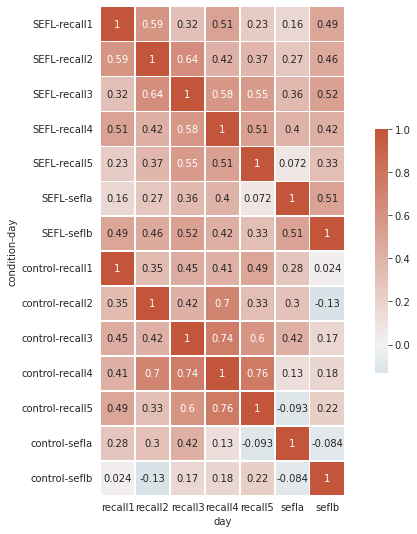

In [ ]:
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, center=0, square=True, linewidths=.5,
            annot=True, cbar_kws={"shrink": .5})
f.savefig(os.path.join(save_path, "freezing_corr_map_SEFL_ctrl_.png"),
          transparent=True, dpi=300)

In [ ]:
filtered_freezing

,freezing,genotype,id,day,condition,sex,cohort,exposure_mins,analyzed_duration,date,time,cohort_id,date_time,man_date_time,dob
72,5.030000,wt,81,sefla,control,male,ptsd2,60,60,2021-04-28,11:59 AM,ptsd2_81,4/28/2021 11:59 AM,2021-04-28 11:59:00,2021-02-16
73,0.450000,wt,81,seflb,control,male,ptsd2,3.5,3.5,2021-04-29,4:40 PM,ptsd2_81,4/29/2021 4:40 PM,2021-04-29 16:40:00,2021-02-16
74,8.280000,wt,81,recall1,control,male,ptsd2,5,5,2021-04-30,1:37 PM,ptsd2_81,4/30/2021 1:37 PM,2021-04-30 13:37:00,2021-02-16
75,7.120000,wt,81,recall2,control,male,ptsd2,5,5,2021-05-03,10:17 AM,ptsd2_81,5/3/2021 10:17 AM,2021-05-03 10:17:00,2021-02-16
76,7.570000,wt,81,recall3,control,male,ptsd2,5,5,2021-05-05,10:04 AM,ptsd2_81,5/5/2021 10:04 AM,2021-05-05 10:04:00,2021-02-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,67.160004,wt,31-2,sefla,SEFL,male,ptsd9,60,60,2022-01-12,3:46 PM,ptsd9_31-2,1/12/2022 3:46 PM,2022-01-12 15:46:00,2021-10-13
761,26.730000,wt,31-2,seflb,SEFL,male,ptsd9,5,5,2022-01-13,11:55 AM,ptsd9_31-2,1/13/2022 11:55 AM,2022-01-13 11:55:00,2021-10-13
762,66.746002,wt,31-2,recall1,SEFL,male,ptsd9,5,5,2022-01-14,11:22 AM,ptsd9_31-2,1/14/2022 11:22 AM,2022-01-14 11:22:00,2021-10-13
763,64.634003,,31-2,recall2,SEFL,male,ptsd9,5,5,2022-01-21,3:25 PM,ptsd9_31-2,1/21/2022 3:25 PM,2022-01-21 15:25:00,2021-10-13


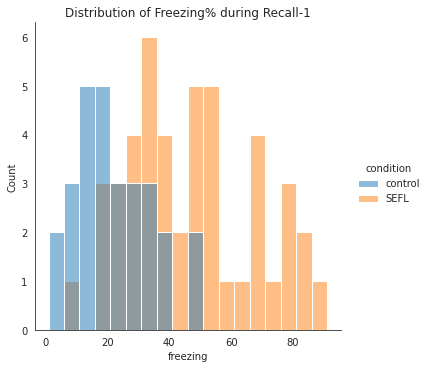

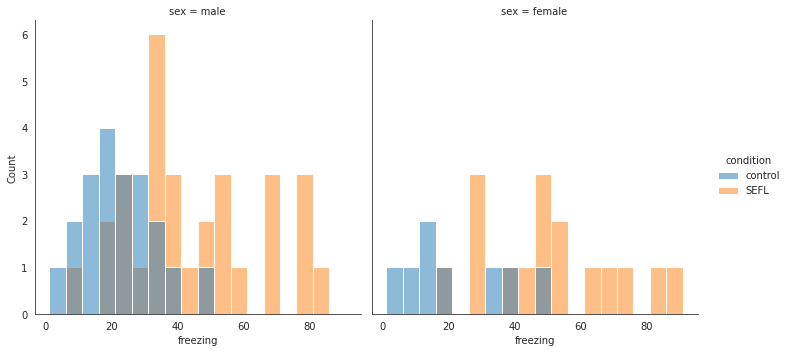

In [ ]:
df = filtered_freezing[filtered_freezing["day"] == "recall1"]
g = sns.displot(df, x="freezing", hue="condition",
                hue_order=["control", "SEFL"], binwidth=5)
g.set(title='Distribution of Freezing% during Recall-1')

g2 = sns.displot(df, x="freezing", col="sex", hue="condition",
                 hue_order=["control", "SEFL"],binwidth=5)
# g.savefig(os.path.join(save_path, 'SEFL_reacall1_frezing_distrib_slected_cohorts.png'),
#           transparent=True, dpi=300)
# g2.savefig(os.path.join(save_path, 'SEFL_reacall1_frezing_distrib_slected_cohorts_males_females.png'),
#            transparent=True, dpi=300)

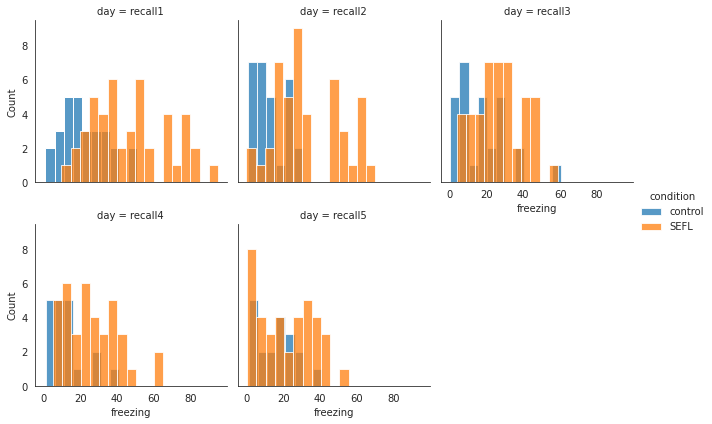

In [ ]:
g = sns.FacetGrid(anova_df, col="day", hue="condition", col_wrap=3,
                sharey=True, sharex=True, legend_out=True)

g.map(sns.histplot, "freezing", common_bins=True, binwidth=5,
      hue_order=["control", "SEFL"], palette="deep")
g.add_legend()
# g.savefig(os.path.join(save_path, 'SEFL_recall1to5_conditions_frezing_distrib_selected_cohorts.png'),
#           transparent=True, dpi=300)

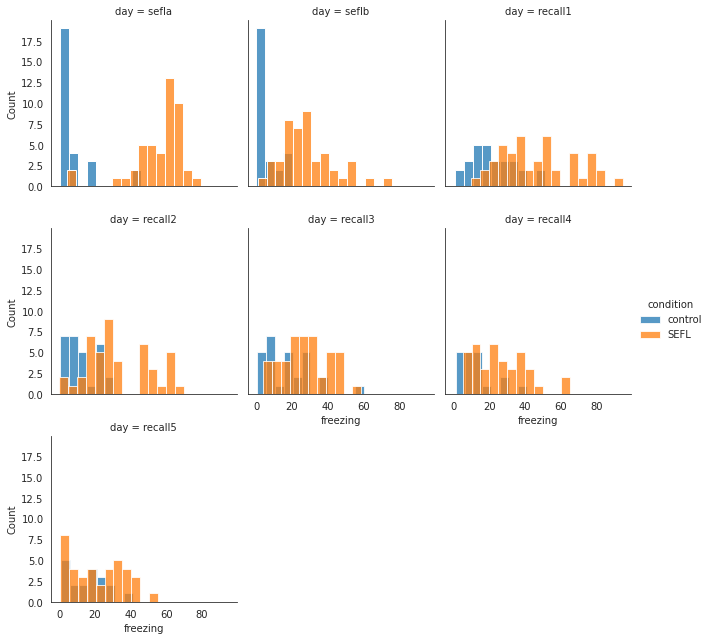

In [ ]:
g = sns.FacetGrid(filtered_freezing, col="day", hue="condition", col_wrap=3,
                sharey=True, sharex=True, legend_out=True)

g.map(sns.histplot, "freezing", common_bins=True, binwidth=5,
      hue_order=["control", "SEFL"], palette="deep")
g.add_legend()

# g.savefig(os.path.join(save_path, 'SEFL_all_conditions_frezing_distrib_selected_cohorts.png'),
#           transparent=True, dpi=300)

In [ ]:
sefl_df = filtered_freezing[filtered_freezing['condition']== 'SEFL']

high_freezers = filtered_freezing[(filtered_freezing['day']=='recall1') &
                                  (filtered_freezing['condition']== 'SEFL') &
                                  (filtered_freezing['freezing']> 60)]
low_freezers = filtered_freezing[(filtered_freezing['day']=='recall1') &
                                 (filtered_freezing['condition']== 'SEFL') &
                                  (filtered_freezing['freezing']< 30)]
avg_freezers =filtered_freezing[(filtered_freezing['day']=='recall1') &
                                 (filtered_freezing['condition']== 'SEFL') &
                                  (filtered_freezing['freezing']> 30) &
                                  (filtered_freezing['freezing']< 60)]

keys_hi = list(high_freezers['cohort_id'].values)
keys_low = list(low_freezers['cohort_id'].values)
keys_avg = list(avg_freezers['cohort_id'].values)

hf_df = filtered_freezing[filtered_freezing['cohort_id'].isin(keys_hi)]
lf_df = filtered_freezing[filtered_freezing['cohort_id'].isin(keys_low)]
avg_df = filtered_freezing[filtered_freezing['cohort_id'].isin(keys_avg)]
print(hf_df['cohort_id'].unique())
print(lf_df['cohort_id'].unique())

['ptsd3_5' 'ptsd3_9' 'ptsd3_11' 'ptsd4_64' 'ptsd5_2' 'ptsd5_84' 'ptsd5_12'
 'ptsd5_13' 'ptsd6_73' 'ptsd9_28-3' 'ptsd9_29-5' 'ptsd9_31-2']
['ptsd2_84' 'ptsd2_93' 'ptsd4_63' 'ptsd4_72' 'ptsd4_83' 'ptsd4_84'
 'ptsd6_52' 'ptsd6_63' 'ptsd6_74' 'ptsd6_72' 'ptsd9_29-2']


In [ ]:
sefl_df.head()

,freezing,genotype,id,day,condition,sex,cohort,exposure_mins,analyzed_duration,date,time,cohort_id,date_time,man_date_time,dob
104,50.639999,wt,84,sefla,SEFL,male,ptsd2,60,60,2021-04-28,1:24 PM,ptsd2_84,4/28/2021 1:24 PM,2021-04-28 13:24:00,2021-02-16
105,10.140000,wt,84,seflb,SEFL,male,ptsd2,3.5,3.5,2021-04-29,5:09 PM,ptsd2_84,4/29/2021 5:09 PM,2021-04-29 17:09:00,2021-02-16
106,25.389999,wt,84,recall1,SEFL,male,ptsd2,5,5,2021-04-30,2:00 PM,ptsd2_84,4/30/2021 2:00 PM,2021-04-30 14:00:00,2021-02-16
107,27.240000,wt,84,recall2,SEFL,male,ptsd2,5,5,2021-05-03,10:43 AM,ptsd2_84,5/3/2021 10:43 AM,2021-05-03 10:43:00,2021-02-16
108,11.230000,wt,84,recall3,SEFL,male,ptsd2,5,5,2021-05-05,10:27 AM,ptsd2_84,5/5/2021 10:27 AM,2021-05-05 10:27:00,2021-02-16


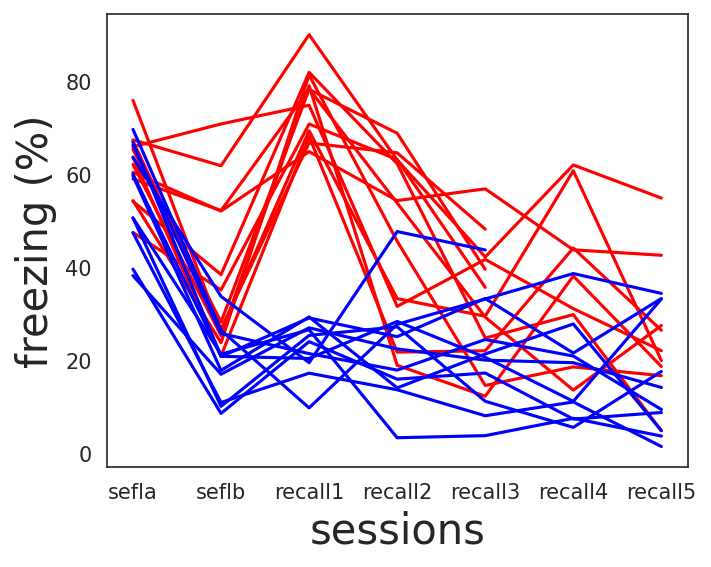

In [ ]:
f, ax = plt.subplots(figsize=(5,4), dpi=150) # , dpi=300
# g = sns.lineplot(data=filtered_freezing[filtered_freezing['condition']== 'SEFL'],
#                  x='day', y='freezing', ax=ax
#                  )
g = sns.lineplot(data=hf_df, x='day', y='freezing', units='cohort_id',
                 estimator=None, ax=ax, color='red')
g = sns.lineplot(data=lf_df, x='day', y='freezing', units='cohort_id',
                 estimator=None, ax=ax, color='blue')

ax.set_ylabel('freezing (%)',fontsize=20)
ax.set_xlabel('sessions', fontsize=20)

plt.savefig(os.path.join(save_path, 'high_and_low_freezers_SEFL_group.png'),
          transparent=True)

# g = sns.lineplot(data=avg_df, x='day', y='freezing', units='cohort_id',
#                  estimator=None)

In [ ]:
sefl_learning = merged_df[merged_df['day']=='recall5']
sefl_learning.head()
# sns.scatterplot(data=sefl_learning, x='freezing', y='slope_pre_shock06', hue='condition')

,freezing,genotype,id,day,condition,sex,cohort,exposure_mins,analyzed_duration,date,time,cohort_id,date_time,man_date_time,dob
6,43.330002,2aFlox_het,5HT2Afl05a-5,recall5,control,male,ptsd1,5,5,NaT,NaN,ptsd1_5HT2Afl05a-5,NaN,NaT,2020-12-11
15,47.320000,wt,5HT2Afl05a-7,recall5,control,male,ptsd1,5,5,NaT,NaN,ptsd1_5HT2Afl05a-7,NaN,NaT,2020-12-11
24,3.210000,wt,5HT2ACre01a-3,recall5,control,male,ptsd1,5,5,NaT,NaN,ptsd1_5HT2ACre01a-3,NaN,NaT,2020-12-31
33,7.850000,wt,sert26a-3,recall5,control,male,ptsd1,5,5,NaT,NaN,ptsd1_sert26a-3,NaN,NaT,2020-11-30
42,47.840000,wt,5HT2Afl5a-6,recall5,SEFL,male,ptsd1,5,5,NaT,NaN,ptsd1_5HT2Afl5a-6,NaN,NaT,2020-12-11


**todo:** construct a df where columns are mouseID, sex, freezing during recall1, recall2 etc. , condition. then you can use the `pairgrid` function below

### Analyzing cohorts with OFT

In [ ]:
# filtering out the cohorts for this analysis (OFT)
cohort_list = ['ptsd2', 'ptsd4', 'ptsd6']
filtered_freezing = freezing[freezing['cohort'].isin(cohort_list)]
filtered_freezing
# setting unique id-s for everyone which is also aligned with id-s of OFT
filtered_freezing.drop(['cohort_id'], axis='columns')
filtered_freezing['cohort'] = filtered_freezing['cohort'].str.upper()
filtered_freezing['cohort_id']= filtered_freezing['cohort']+'_'+filtered_freezing['id']
# filtered_freezing.head()

# saing the filtered csv
# filtered_freezing.to_csv(save_path+'fitered.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
filtered_freezing

,freezing,cohort_id,id,day,condition,sex,cohort,reexposure_mins,duration,days_since_sefla
72,5.026333,PTSD2_81,81,sefla,control,male,PTSD2,NaN,60.0,0.0
73,8.831167,PTSD2_82,82,sefla,control,male,PTSD2,NaN,60.0,0.0
74,2.603000,PTSD2_91,91,sefla,control,male,PTSD2,NaN,60.0,0.0
75,1.912500,PTSD2_92,92,sefla,control,male,PTSD2,NaN,60.0,0.0
76,50.638833,PTSD2_84,84,sefla,SEFL,male,PTSD2,NaN,60.0,0.0
...,...,...,...,...,...,...,...,...,...,...
517,3.870681,PTSD6_71,71,recall6,control,female,PTSD6,25.0,30.0,55.0
518,4.938455,PTSD6_75,75,recall6,SEFL,female,PTSD6,25.0,30.0,55.0
519,16.580157,PTSD6_74,74,recall6,SEFL,female,PTSD6,25.0,30.0,55.0
520,37.787335,PTSD6_73,73,recall6,SEFL,female,PTSD6,25.0,30.0,55.0


In [ ]:
# number of mice in this data:
mice_number = filtered_freezing.cohort_id.nunique()
print(f'all mice: {mice_number}')
males_females = filtered_freezing.groupby(['sex']).cohort_id.nunique()
print(f'males and females: {males_females}')

all mice: 34
males and females: sex
female    12
male      22
Name: cohort_id, dtype: int64


### plotting freezing distributions

### ploting freezing over time for all mice in the dataframe

### only for the 3 PTSD groups (2,4,6)

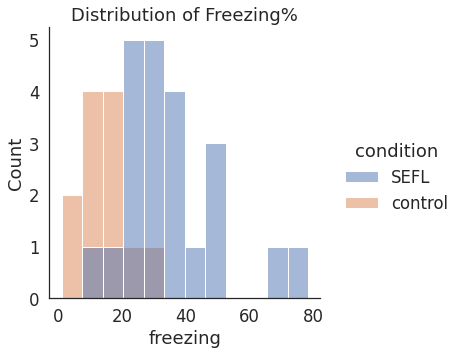

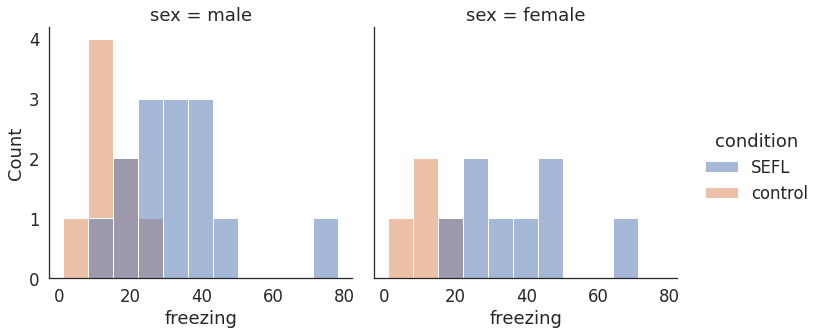

In [ ]:
df = filtered_freezing[filtered_freezing["day"] == "recall1"]
# control = df[df["condition"] == "control"]
# sefl = df[df["condition"] == "SEFL"]
d = sns.displot(df, x="freezing", hue="condition", bins=12)
d.set(title='Distribution of Freezing%')
d2 = sns.displot(df, x="freezing", col="sex", hue="condition", bins=11)

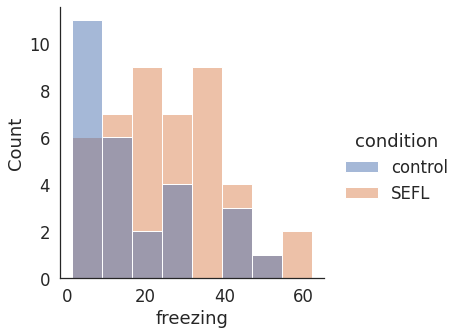

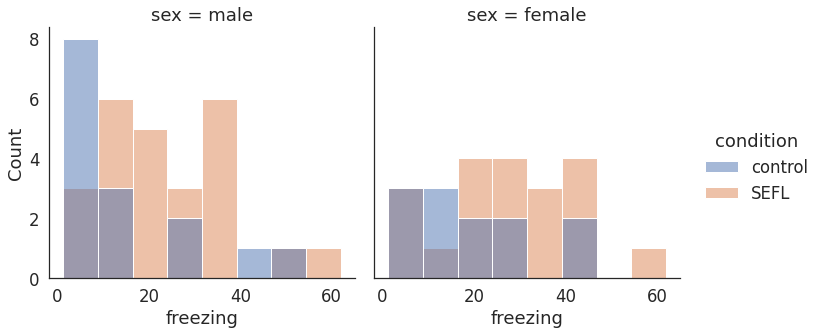

In [ ]:
df = freezing[freezing["day"] == "recall4"]
sns.displot(df, x="freezing", hue="condition")
sns.displot(df, x="freezing", col="sex", hue="condition")

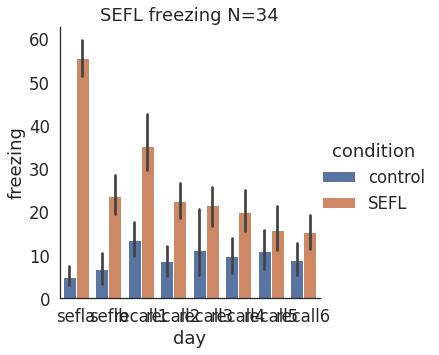

In [ ]:
g = sns.catplot(data = filtered_freezing, kind='bar',
               x="day", y="freezing", hue="condition")

g.set(title = f'SEFL freezing N={mice_number}')

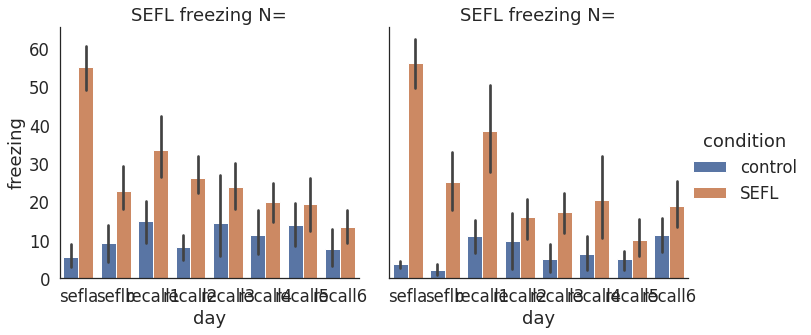

In [ ]:
g2 = sns.catplot(data= filtered_freezing, kind='bar',
                x='day', y='freezing', hue='condition',
                 col='sex')
g2.set(title = 'SEFL freezing N=')

In [ ]:
#saving the plots
g.savefig(save_path+'ptsd_freezing_all.png')
g2.savefig(save_path+'ptsd_freezing_sexes.png')

### T-tests on all the mice

In [ ]:
days = filtered_freezing.day.unique()
days

array(['sefla', 'seflb', 'recall1', 'recall2', 'recall3', 'recall4',
       'recall5', 'recall6'], dtype=object)

In [ ]:
# t-tests on the whole population
stats = []
for day in days:
  df = filtered_freezing[filtered_freezing["day"] == day]
  ctrl = df[df["condition"] == "control"]
  sefl = df[df["condition"] == "SEFL"]
  stats.append((day, ttest_ind(ctrl['freezing'], sefl['freezing'])))
stats

NameError: ignored

### T-test on males and females

In [ ]:
male_stats = []
male_df = filtered_freezing[filtered_freezing['sex'] == "male"]
for day in days:
  df = male_df[male_df["day"] == day]
  ctrl = df[df["condition"] == "control"]
  sefl = df[df["condition"] == "SEFL"]
  male_stats.append((day, ttest_ind(ctrl['freezing'], sefl['freezing'])))
male_stats

[('sefla',
  Ttest_indResult(statistic=-11.527460600337495, pvalue=2.7557735861618507e-10)),
 ('seflb',
  Ttest_indResult(statistic=-3.078262484176159, pvalue=0.005929877509473304)),
 ('recall1',
  Ttest_indResult(statistic=-3.037196418521732, pvalue=0.0065067898982747565)),
 ('recall2',
  Ttest_indResult(statistic=-5.028456062798688, pvalue=6.438081146607302e-05)),
 ('recall3',
  Ttest_indResult(statistic=-1.4634211477156827, pvalue=0.15889212152850243)),
 ('recall4',
  Ttest_indResult(statistic=-1.9625338690468423, pvalue=0.06376337577659434)),
 ('recall5',
  Ttest_indResult(statistic=-0.9761344255878741, pvalue=0.3406578397974326)),
 ('recall6',
  Ttest_indResult(statistic=-1.538357059662128, pvalue=0.13963311149357552))]

In [ ]:
female_stats = []
female_df = filtered_freezing[filtered_freezing['sex'] == "female"]
for day in days:
  df = female_df[female_df["day"] == day]
  ctrl = df[df["condition"] == "control"]
  sefl = df[df["condition"] == "SEFL"]
  female_stats.append((day, ttest_ind(ctrl['freezing'], sefl['freezing'])))
female_stats

[('sefla',
  Ttest_indResult(statistic=-10.279515432596304, pvalue=1.233929879125089e-06)),
 ('seflb',
  Ttest_indResult(statistic=-3.895658699859487, pvalue=0.002981981934503957)),
 ('recall1',
  Ttest_indResult(statistic=-3.1783138217718028, pvalue=0.009847606843517865)),
 ('recall2',
  Ttest_indResult(statistic=-1.218048860401253, pvalue=0.25116381937537935)),
 ('recall3',
  Ttest_indResult(statistic=-2.848390929909765, pvalue=0.017297741675859686)),
 ('recall4',
  Ttest_indResult(statistic=-1.6590817563920923, pvalue=0.12808870979678286)),
 ('recall5',
  Ttest_indResult(statistic=-1.2018459172524187, pvalue=0.2571115900783359)),
 ('recall6',
  Ttest_indResult(statistic=-1.445983983184109, pvalue=0.17878461225352893))]

### Reading and wranging w/ OFT data

In [ ]:
oft_path = os.path.join(base_data_path, oft_data)
oft_df = pd.read_csv(oft_path)
# oft_df.rename(columns={'timepoint': 'day'}, inplace=True)
oft_df.drop(oft_df.columns[0:2], axis=1, inplace=True)
oft_df.tail()

,cohort,behavior,timepoint,mouse_id,center_occupancy,floor_occupancy,velocity_cmps,distance_cm,condition,sex,cohort_id,timepoint_numerical
97,PTSD6,OFT,4wk,71,0.132302,0.862122,5.474031,3019.556578,control,female,PTSD6_71,4
98,PTSD6,OFT,4wk,72,0.089647,0.799808,5.415922,3579.920656,SEFL,female,PTSD6_72,4
99,PTSD6,OFT,4wk,73,0.078712,0.891427,3.922008,2374.447952,SEFL,female,PTSD6_73,4
100,PTSD6,OFT,4wk,74,0.184584,0.853131,6.396093,3871.233827,SEFL,female,PTSD6_74,4
101,PTSD6,OFT,4wk,75,0.120061,0.917665,6.269212,3501.592509,SEFL,female,PTSD6_75,4


In [ ]:
print(oft_df.shape)
filtered_freezing.shape

(102, 12)


(272, 10)

merging freezing data w/ OFT

In [ ]:
frames = [filtered_freezing, oft_df]
result = pd.merge(filtered_freezing, oft_df, on=["cohort_id", "sex", "condition", "cohort"],
                  how="outer")

In [ ]:
result.shape

(816, 18)

In [ ]:
result.to_csv(save_path+'merged.csv')

In [ ]:
result

,freezing,cohort_id,id,day,condition,sex,cohort,reexposure_mins,duration,days_since_sefla,behavior,timepoint,mouse_id,center_occupancy,floor_occupancy,velocity_cmps,distance_cm,timepoint_numerical
0,5.026333,PTSD2_81,81,sefla,control,male,PTSD2,NaN,60.0,0.0,OFT,baseline,81,0.158255,0.822902,5.330484,3676.576855,0
1,5.026333,PTSD2_81,81,sefla,control,male,PTSD2,NaN,60.0,0.0,OFT,2wk,81,0.124919,0.823925,6.546537,3377.576542,2
2,5.026333,PTSD2_81,81,sefla,control,male,PTSD2,NaN,60.0,0.0,OFT,4wk,81,0.230417,0.858311,7.539227,4530.445303,4
3,0.445000,PTSD2_81,81,seflb,control,male,PTSD2,NaN,3.0,1.0,OFT,baseline,81,0.158255,0.822902,5.330484,3676.576855,0
4,0.445000,PTSD2_81,81,seflb,control,male,PTSD2,NaN,3.0,1.0,OFT,2wk,81,0.124919,0.823925,6.546537,3377.576542,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,6.856634,PTSD6_72,72,recall5,SEFL,female,PTSD6,20.0,5.0,48.0,OFT,baseline,72,0.096495,0.716125,6.891135,4503.929227,0
812,6.856634,PTSD6_72,72,recall5,SEFL,female,PTSD6,20.0,5.0,48.0,OFT,4wk,72,0.089647,0.799808,5.415922,3579.920656,4
813,13.806911,PTSD6_72,72,recall6,SEFL,female,PTSD6,25.0,30.0,55.0,OFT,2wk,72,0.094947,0.915691,2.909873,1988.763732,2
814,13.806911,PTSD6_72,72,recall6,SEFL,female,PTSD6,25.0,30.0,55.0,OFT,baseline,72,0.096495,0.716125,6.891135,4503.929227,0
